In [2]:
%run ../draw_functions.py
%run ../kstest.py

In [3]:
from draw_functions import *
from kstest import *

In [4]:
#read csv
df = pd.read_csv('../csv/MX324032023CI01.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope
0,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.0150,2.926134,005013D,O2K0CH6GN,NaN
1,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.0250,2.945024,005013D,O2K0CH6GN,1.889050
2,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.0350,2.787965,005013D,O2K0CH6GN,-15.705946
3,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.0450,2.686036,005013D,O2K0CH6GN,-10.192898
4,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.0550,2.631979,005013D,O2K0CH6GN,-5.405725
...,...,...,...,...,...,...
6067,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.6250,13.093066,000205D,O2K0CC6R3,29.539064
6068,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.6350,13.363935,000205D,O2K0CC6R3,27.086923
6069,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.6384,13.453425,000205D,O2K0CC6R3,26.320476
6070,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.6450,13.627141,000205D,O2K0CC6R3,26.320476


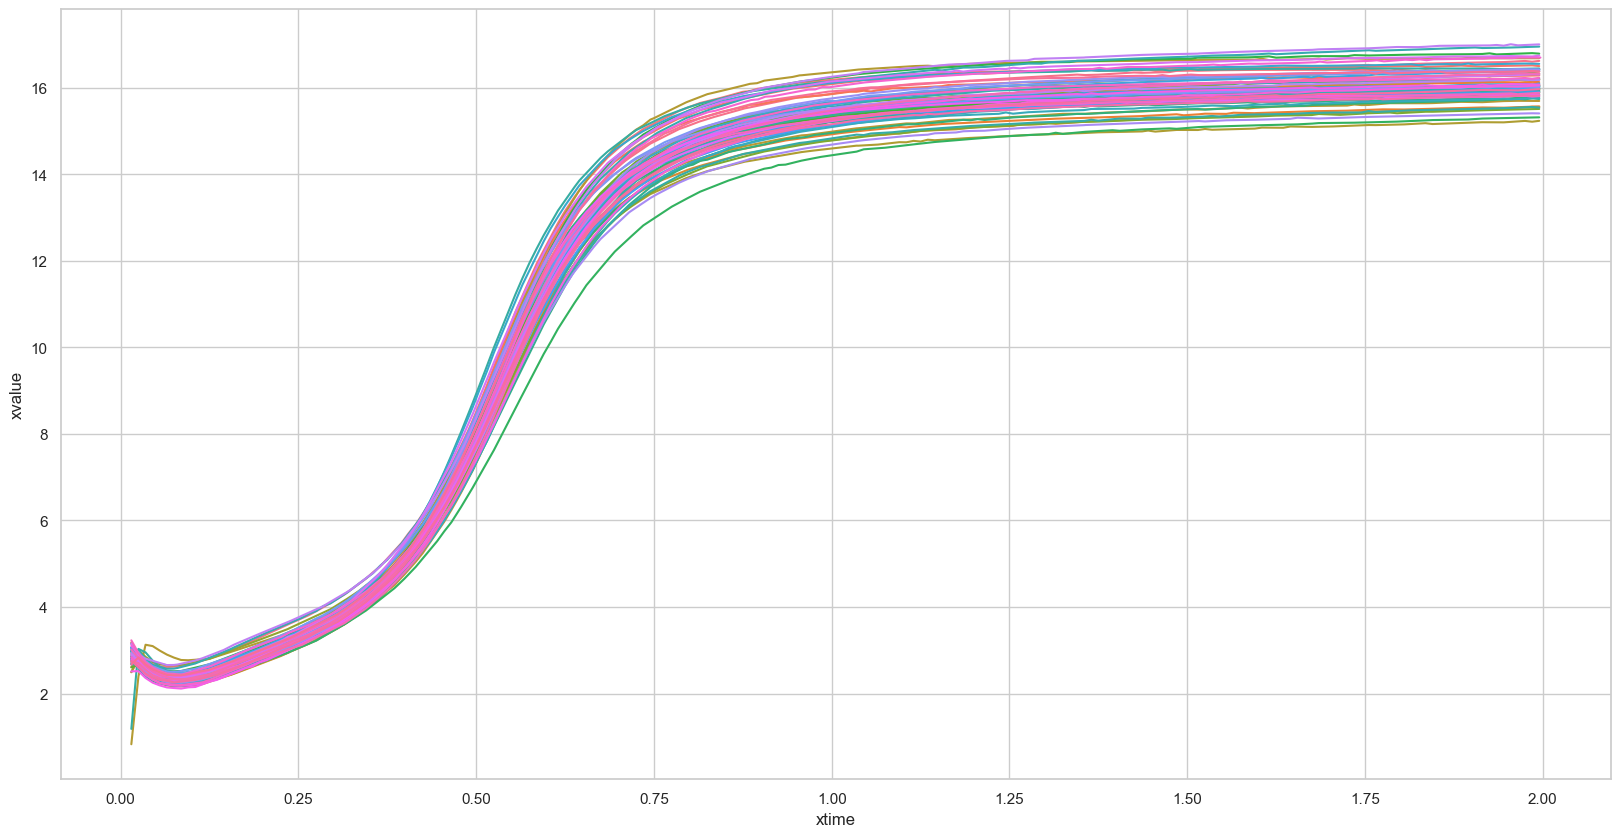

In [4]:
dessiner_commande(df)

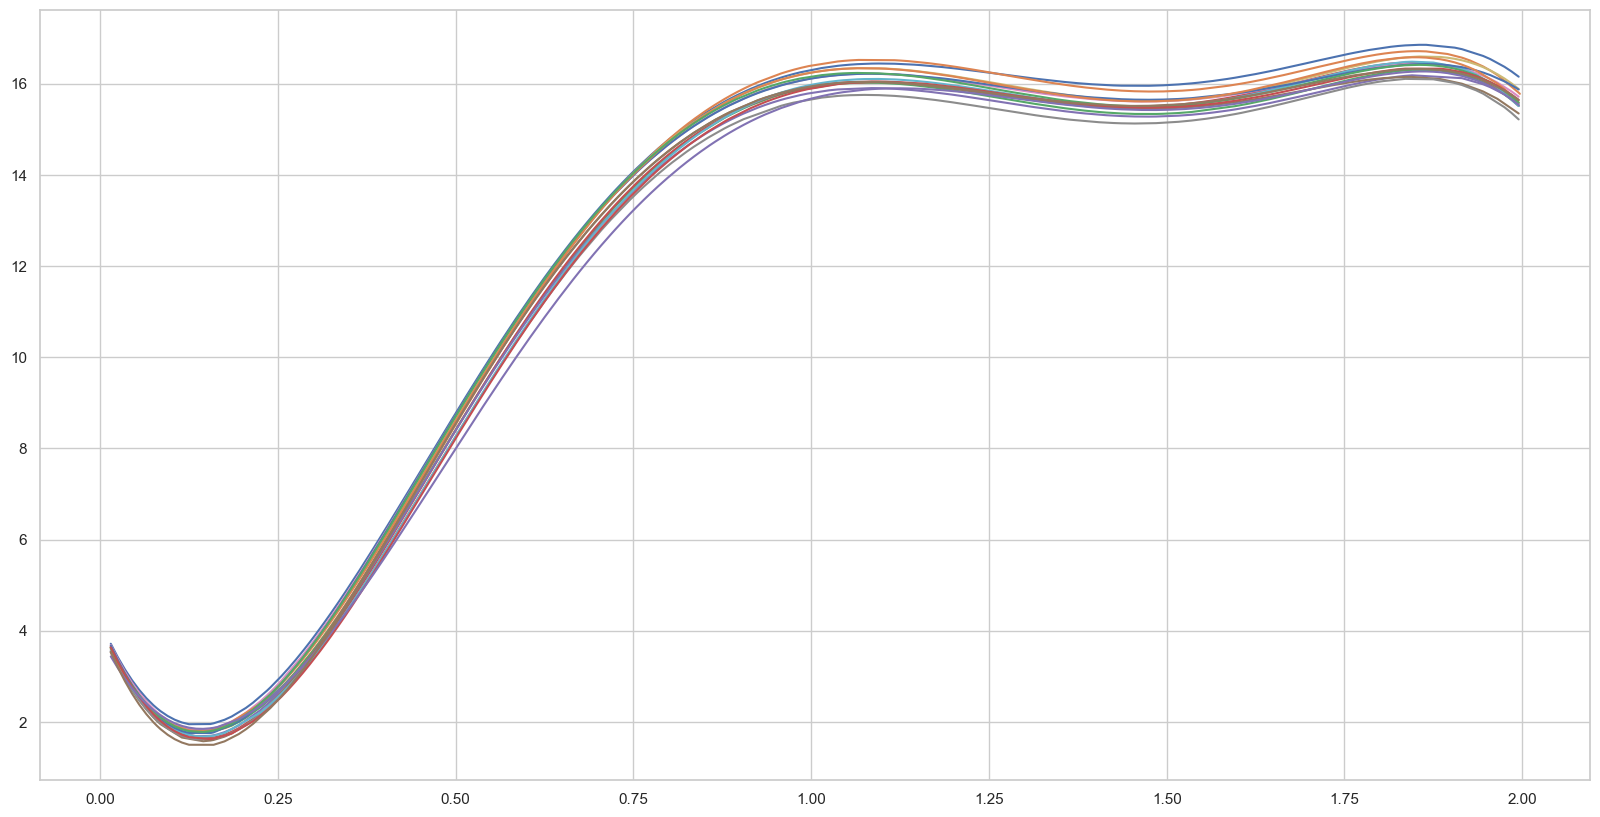

In [5]:
dessiner_commande(df,degree=6)

## Analyse des pentes

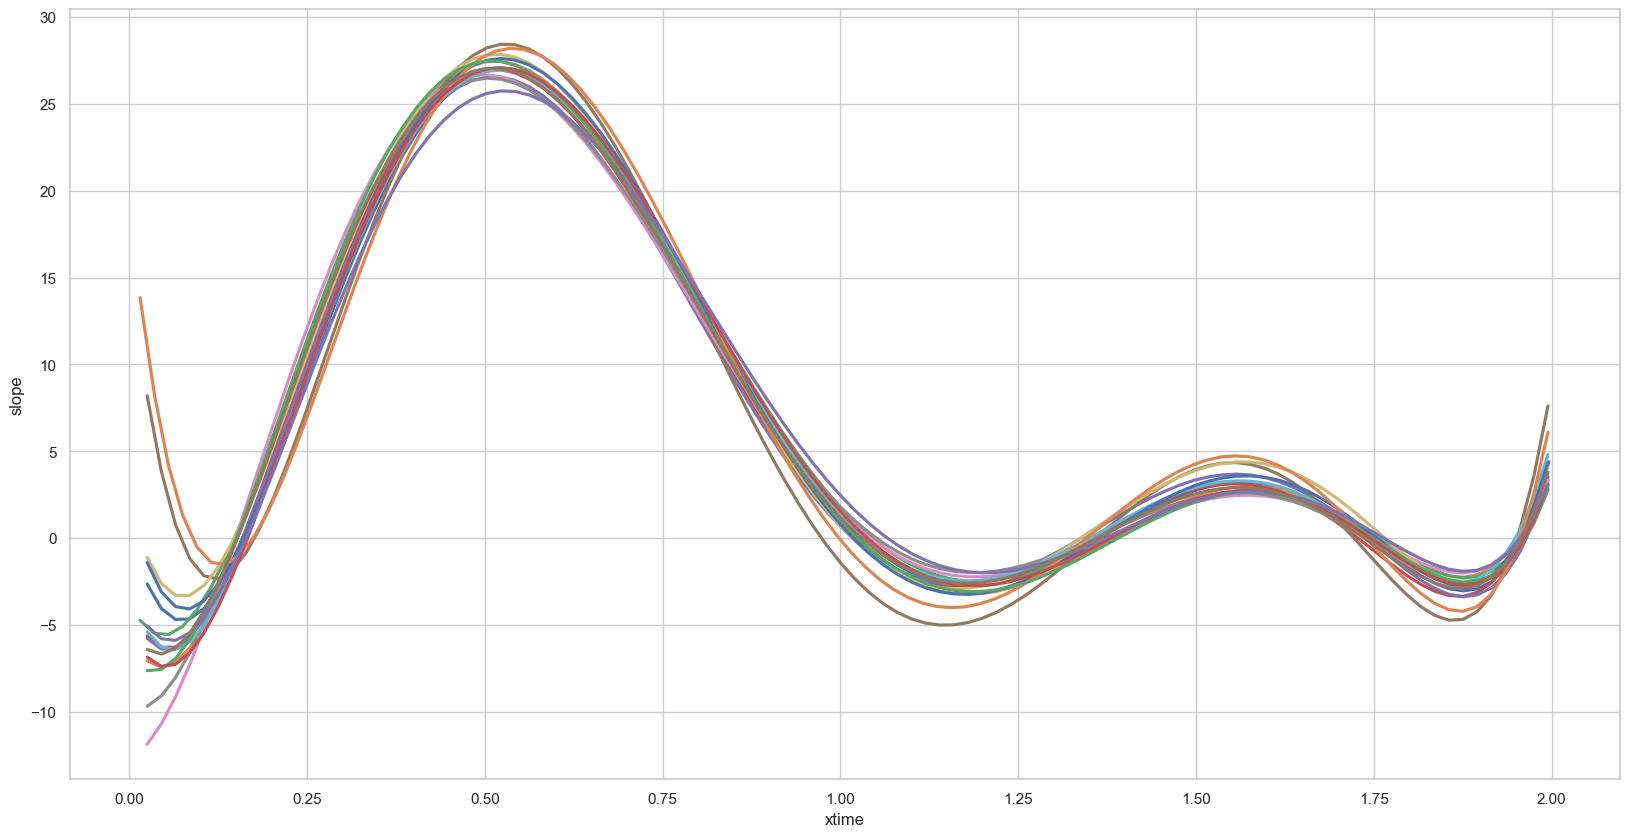

In [6]:
dessiner_commande_slope(df, 6 ,unified=True)

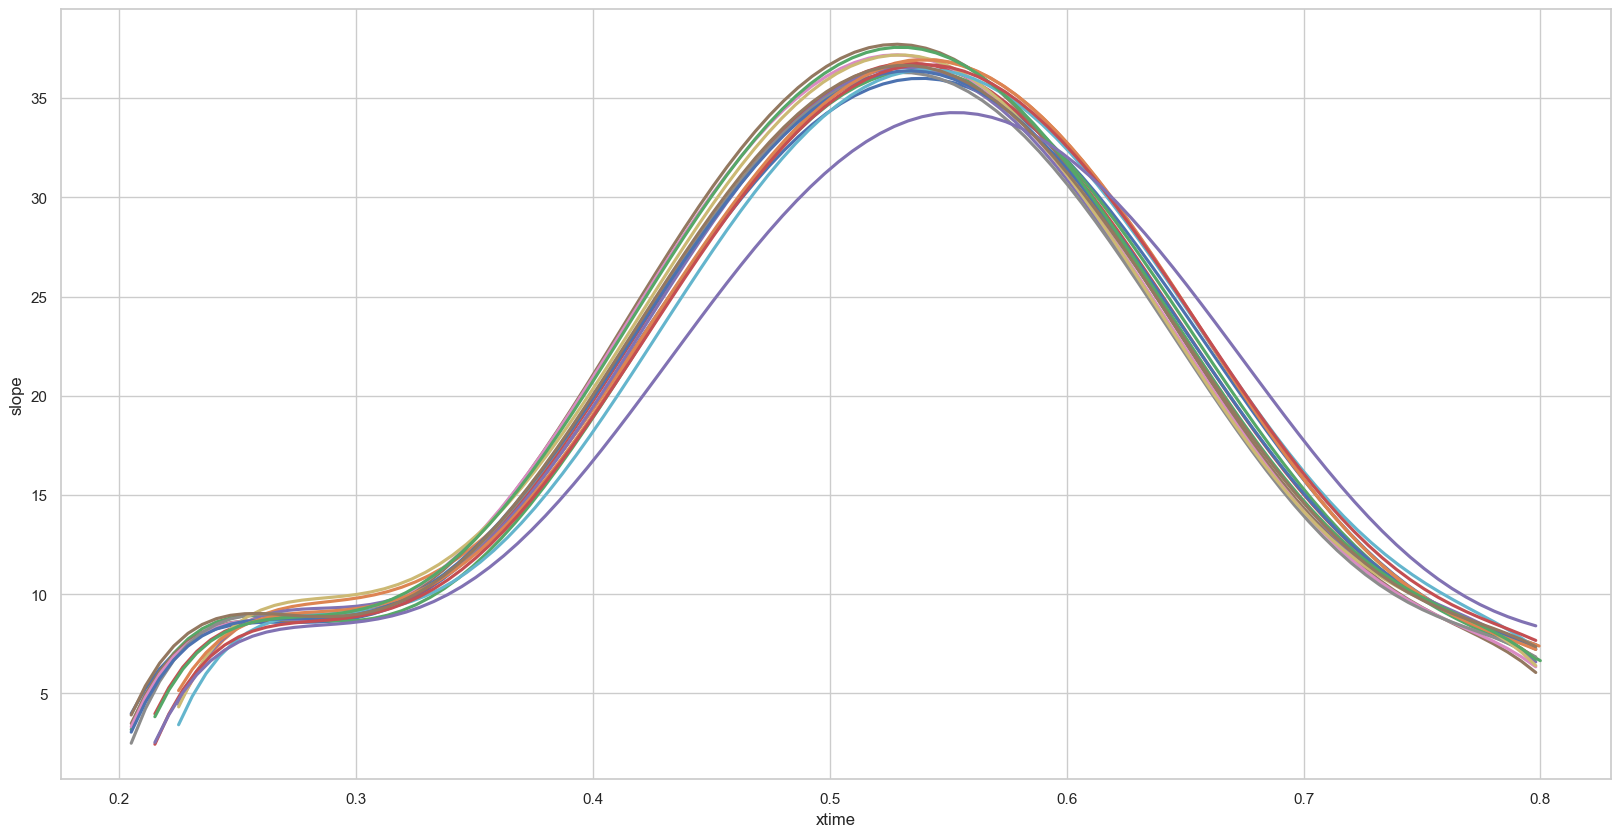

In [7]:
dessiner_commande_slope(df_02_08, 6 ,unified=True)

- Batch 005414D: 4.638215814863276
- Batch 000205D: 3.227792963766149
- Batch 010516D: 3.1852831356207676
- Batch 002008D: 2.9172991951612377
- Batch 005013D: 2.63703822000919
- Batch 233801D: 2.6328664526862657
- Batch 235003D: 2.5802653926805315
- Batch 000806D: 2.5114652845376817
- Batch 003110D: 2.4860353389971617
- Batch 004412D: 2.24728857381369
- Batch 002609D: 2.034721666565736
- Batch 005915D: 1.9303682844605925
- Batch 001407D: 1.9044759616784224
- Batch 235604D: 1.8708536680322105
- Batch 003811D: 1.8494950208504024
- Batch 234402D: 1.494969520318038


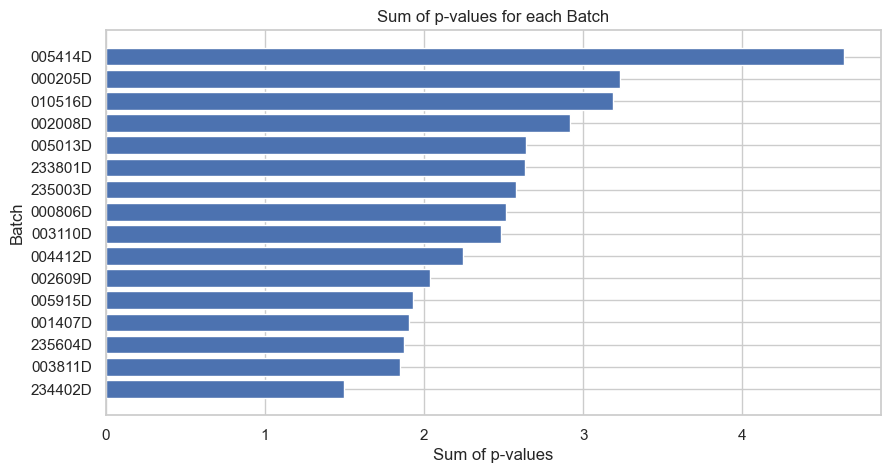

In [9]:
batch_pvalues = ks_test_slope(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

- Batch 005013D: 6.530336174457488
- Batch 235003D: 6.5197776098618645
- Batch 235604D: 4.180519363182865
- Batch 002609D: 3.421746971970466
- Batch 003110D: 2.907038445351452
- Batch 002008D: 2.8987329943453255
- Batch 001407D: 2.848930160995827
- Batch 005414D: 2.836684545008536
- Batch 000205D: 2.4604696053178707
- Batch 000806D: 2.290079051353717
- Batch 010516D: 2.2708462726614194
- Batch 233801D: 2.2181621563831575
- Batch 234402D: 1.9748730006443596
- Batch 005915D: 1.7889350030035005
- Batch 003811D: 1.6467931728379333
- Batch 004412D: 1.6116682608253647


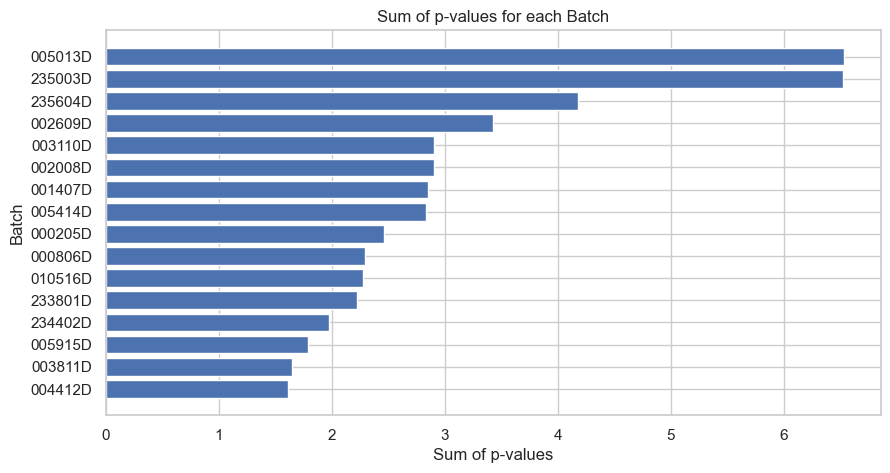

In [10]:
batch_pvalues = ks_test_value(df, 6)

visualiser_pvalue(batch_pvalues, log=True)

In [13]:
from utils import *

df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)].copy()

df_ = add_fitted_slope(df_02_08)

In [14]:
df_02_08

,ResultCurve_id,xtime,xvalue,Batch,Sample_Code,slope,fitted_slope
12,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.239400,3.626770,005013D,O2K0CH6GN,7.594102,0.845940
13,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.265000,3.813302,005013D,O2K0CH6GN,7.286406,4.905962
14,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.286942,4.011769,005013D,O2K0CH6GN,9.045166,8.268681
15,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.315000,4.290374,005013D,O2K0CH6GN,9.929541,12.372099
16,7DB3C8AD-D0A9-458A-A9E5-0DFC47343FD9,0.319200,4.341465,005013D,O2K0CH6GN,12.164585,12.964628
...,...,...,...,...,...,...,...
6067,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.625000,13.093066,000205D,O2K0CC6R3,29.539064,NaN
6068,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.635000,13.363935,000205D,O2K0CC6R3,27.086923,NaN
6069,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.638400,13.453425,000205D,O2K0CC6R3,26.320476,NaN
6070,68833106-02D2-4AC2-92FA-C92B8EEDFD35,0.645000,13.627141,000205D,O2K0CC6R3,26.320476,NaN


In [17]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']

values = np.array(max_slope_sample_xtime).reshape(-1, 1)
# Générer les liens entre les clusters
linked = linkage(values, 'ward')

KeyError: '[nan] not in index'